In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since the titanic dataset is already present in the seaborn library we don't need to upload it

In [156]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [157]:
#In this dataset we can clearly see that some features/columns are repeated like class, sex and embark_town, 
#while some features seem useless, we have to drop them
df = df.drop(columns=['class','who','adult_male','embark_town','deck','alive'])


Now our dataset will look like...

In [125]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,True
888,0,3,female,NaN,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


In [126]:
df.shape

(891, 9)

# Data Understanding

<Axes: xlabel='survived'>

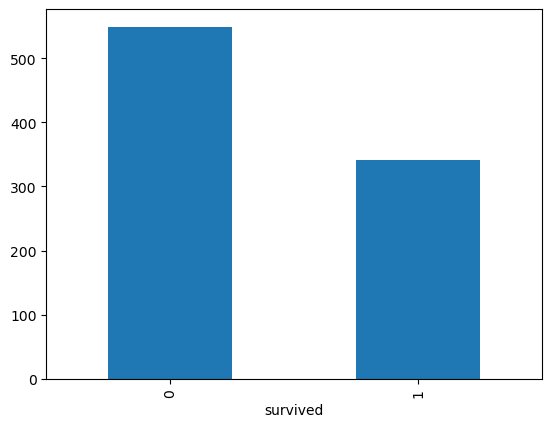

In [31]:
df['survived'].value_counts().plot(kind='bar')

In [12]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

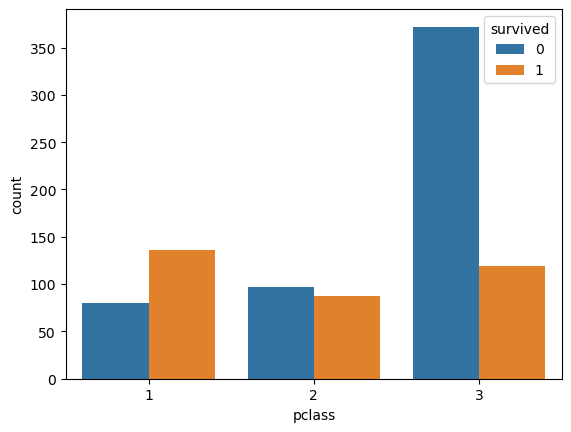

In [32]:
sns.countplot(data=df,x = 'pclass',hue = 'survived')

<Axes: xlabel='age', ylabel='Count'>

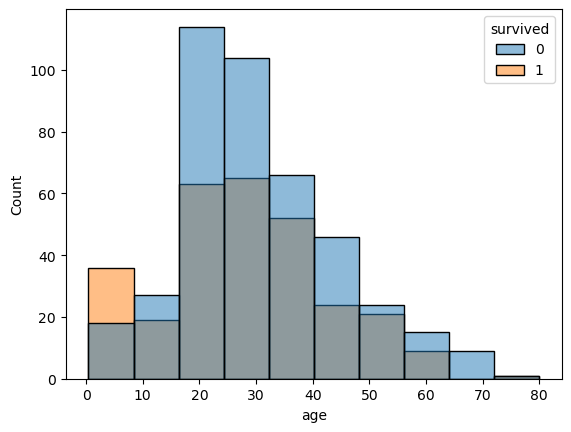

In [35]:
sns.histplot(data=df,x='age',bins =10, hue = 'survived')

<Axes: xlabel='fare', ylabel='Count'>

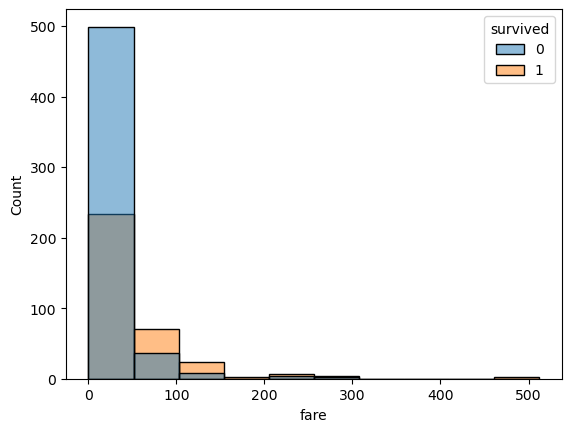

In [36]:
sns.histplot(data=df,x='fare',bins =10, hue = 'survived')

We got to know about the ranges of values or 5 value summary of numeric data and counts of the categories of the categorical data 

In [ ]:
# Now we'll the correlation of the cloumns with our output i.e survived column

In [23]:
df.corr(numeric_only = True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Here we can see that pclass has negative correlation with survived and fare has positive correlation with survived

<Axes: xlabel='embarked', ylabel='count'>

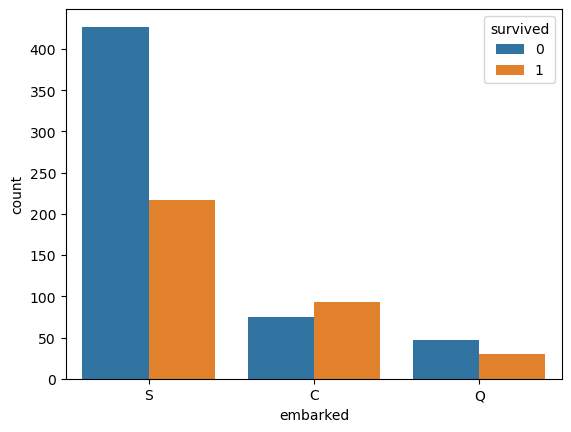

In [37]:
sns.countplot(data = df, x = 'embarked', hue = 'survived')

In [40]:
df.groupby('sex')['survived'].mean()
df.groupby('pclass')['survived'].mean()
df.pivot_table(values='survived', index='pclass', columns='sex', aggfunc='mean')

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


From above data visualization we can conclude that...
1. Females survived more than male
2. Children survived more than adults
3. Survival rate is higher in first class

Instead of visualizing columns one by one we can understand data by using ydata profiling formerly called as pandas profiling


In [158]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 9/9 [00:00<00:00, 97794.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

In [127]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64

In [ ]:
# There are two missing values in embarked feature so we'll replace it with mode

In [129]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/var/folders/yb/c8kvh07s7h700sk9_gn5zqxm0000gn/T/ipykernel_16213/2360562001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/var/folders/yb/c8kvh07s7h700sk9_gn5zqxm0000gn/T/ipykernel_16213/2360562001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [130]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64

<Axes: xlabel='age'>

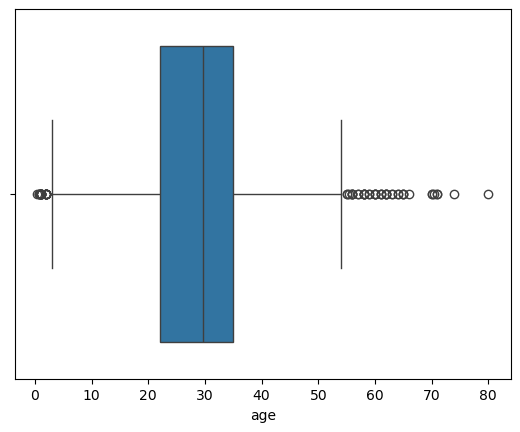

In [131]:
sns.boxplot(data=df,x='age')

<Axes: xlabel='fare'>

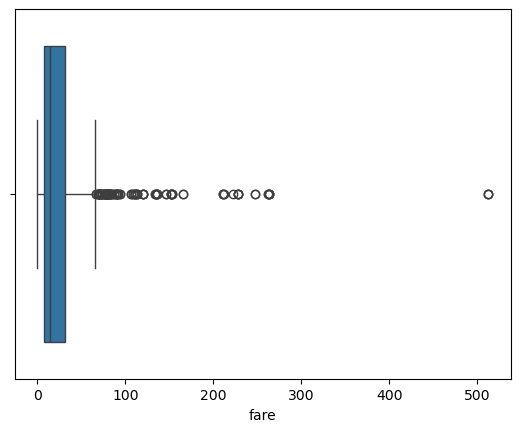

In [101]:
sns.boxplot(data=df, x='fare')

In [132]:
df.shape

(891, 9)

In [133]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])          # male=1, female=0
df['embarked'] = label_enc.fit_transform(df['embarked'])# C=0, Q=1, S=2 
df['alone'] = label_enc.fit_transform(df['alone']) # false=0 true=1

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['survived']),df['survived'],test_size = 0.2)

In [135]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,alone
336,1,1,29.000000,1,0,66.6000,2,0
752,3,1,33.000000,0,0,9.5000,2,1
297,1,0,2.000000,1,2,151.5500,2,0
326,3,1,61.000000,0,0,6.2375,2,1
809,1,0,33.000000,1,0,53.1000,2,0
...,...,...,...,...,...,...,...,...
359,3,0,29.699118,0,0,7.8792,1,1
110,1,1,47.000000,0,0,52.0000,2,1
196,3,1,29.699118,0,0,7.7500,1,1
217,2,1,42.000000,1,0,27.0000,2,0


In [140]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(Y_test,y_pred))

0.8491620111731844


In [153]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       110
           1       0.89      0.70      0.78        69

    accuracy                           0.85       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.85      0.84       179



Here, Tree based model 'Random Forest' is best for model building because we had some outliers in the age and fare features and tree based model is robust to outliers.
We did not remove them because they were important to preserve our inferences that we made while visualizing data.